Here we did LDA and PCA using sklearn library to compare with out own method

In [1]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats.mstats import mquantiles
from scipy.spatial.distance import cdist

In [2]:
data_train = np.load('data/fashion_test.npy', mmap_mode='r')
data_test = np.load('data/fashion_train.npy', mmap_mode='r')

In [3]:
X_train = data_train[:, :-1]
y_train = data_train[:, -1]


In [4]:
clf = LinearDiscriminantAnalysis(n_components=2)
clf.fit(X_train, y_train)
LinearDiscriminantAnalysis()

LinearDiscriminantAnalysis()

In [5]:
transformed_X_train= clf.fit_transform(X_train, y_train)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

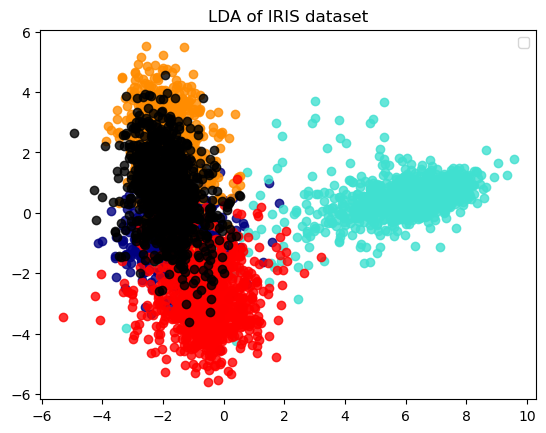

In [6]:
plt.figure()
colors = ["navy", "turquoise", "darkorange", 'red', 'black', 'green']

lw = 2
plt.figure()
for color, i in zip(colors, [0, 1, 2, 3, 4]):
    plt.scatter(
        transformed_X_train[y_train == i, 0], transformed_X_train[y_train == i, 1], alpha=0.8, color=color
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

In [7]:
pca = PCA(n_components=2)
pca.fit(X_train)
PCA(n_components=2)


PCA(n_components=2)

In [8]:
pca_transformed_X_train= pca.fit_transform(X_train, y=None)
pca_transformed_X_train

array([[-1096.77124467,  -298.52782004],
       [ 1535.5015589 ,  -954.88358886],
       [ -692.707419  , -1020.04189637],
       ...,
       [ 1581.05144219,   719.00048346],
       [ 1427.36111878,   -91.3314342 ],
       [  523.95125538,   830.65896902]])

In [9]:
from sklearn.decomposition import PCA

# Assuming X_train is your feature matrix
pca = PCA(n_components=2)
pca_transformed_X_train_2 = pca.fit_transform(X_train)

# Access PC1 and PC2
pc1, pc2 = pca.components_[:2]

print("PC1:", pc1.shape)
print("PC2:", pc2.shape)


PC1: (784,)
PC2: (784,)


In [10]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  


Proportion of Variance Explained :  [0.31648278 0.16474325]


In [11]:
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Cumulative Prop. Variance Explained:  [0.31648278 0.48122603]


In [12]:
print(pca.explained_variance_) 


[1082164.17898431  563314.18851366]


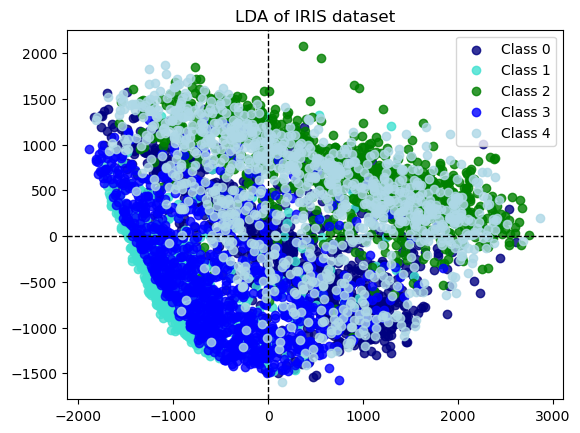

In [13]:


plt.figure()

colors = ["navy", "turquoise", "green", 'blue', 'lightblue']
lw = 2

for color, i in zip(colors, [0, 1, 2, 3, 4]):
    plt.scatter(
        pca_transformed_X_train[y_train == i, 0], pca_transformed_X_train[y_train == i, 1], alpha=0.8, color=color, label=f'Class {i}'
    )
# Plotting x-axis (y=0 line)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Plotting y-axis (x=0 line)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")
plt.show()


In [31]:
# Perform PCA
pca = PCA(n_components=2)
pca_transformed_X_train = pca.fit_transform(X_train[y_train==1])

In [33]:
pca_transformed_X_train.shape

(1000, 2)

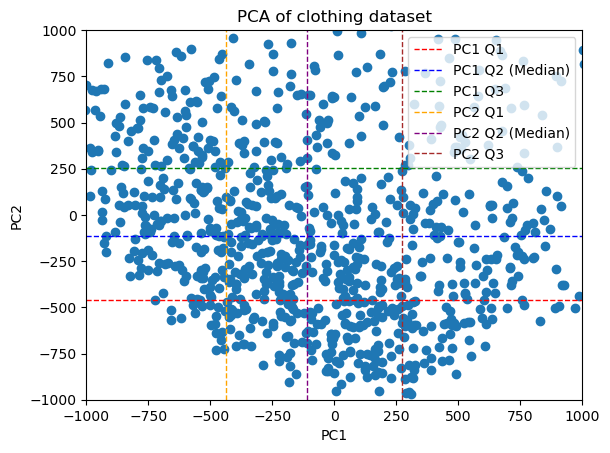

In [27]:
from scipy.stats.mstats import mquantiles


# Set limits for x and y axes
xlim = (-1000, 1000)
ylim = (-1000, 1000)

# Scatter plot of PC1 vs PC2 
plt.scatter(pca_transformed_X_train[:, 0], pca_transformed_X_train[:, 1]) #c=y_train[]

# Calculate marginal quantiles for PC1 and PC2 
quantiles_pc1 = mquantiles(pca_transformed_X_train[(pca_transformed_X_train[:, 0] >= xlim[0]) & (pca_transformed_X_train[:, 0] <= xlim[1]), 0], prob=[0.25, 0.5, 0.75])
quantiles_pc2 = mquantiles(pca_transformed_X_train[(pca_transformed_X_train[:, 1] >= ylim[0]) & (pca_transformed_X_train[:, 1] <= ylim[1]), 1], prob=[0.25, 0.5, 0.75])

# Plotting quantiles on the sides of the scatter plot
plt.axhline(quantiles_pc1[0], color='red', linestyle='--', linewidth=1, label='PC1 Q1')
plt.axhline(quantiles_pc1[1], color='blue', linestyle='--', linewidth=1, label='PC1 Q2 (Median)')
plt.axhline(quantiles_pc1[2], color='green', linestyle='--', linewidth=1, label='PC1 Q3')


plt.axvline(quantiles_pc2[0], color='orange', linestyle='--', linewidth=1, label='PC2 Q1')
plt.axvline(quantiles_pc2[1], color='purple', linestyle='--', linewidth=1, label='PC2 Q2 (Median)')
plt.axvline(quantiles_pc2[2], color='brown', linestyle='--', linewidth=1, label='PC2 Q3')

# Set limits for x and y axes
plt.xlim(xlim)
plt.ylim(ylim)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of clothing dataset')
plt.legend()

plt.show()


In [23]:
pca_transformed_X_train.shape

(1000, 2)

In [25]:
pca_transformed_X_train_2.shape

(5000, 2)

In [17]:
quantiles_pc1

array([-462.02460759, -113.86097057,  251.7447505 ])

In [18]:
quantiles_pc2

array([-436.52930248, -109.00244031,  274.49834484])

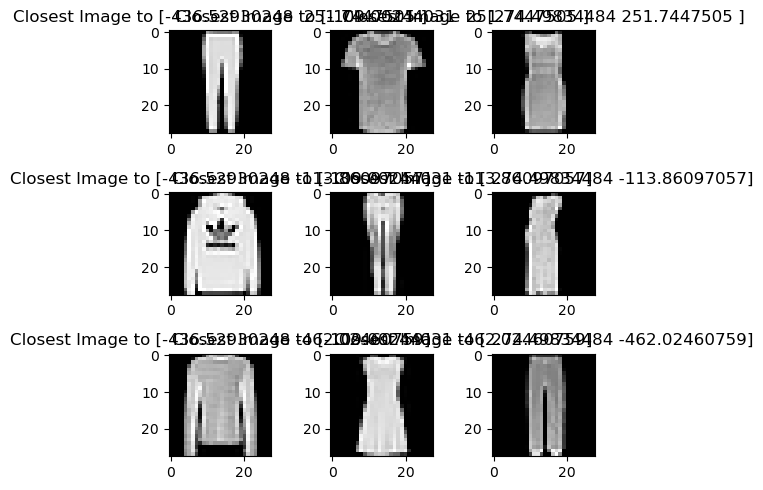

In [36]:
def find_img(X, target_coordinates):
    num_images = len(target_coordinates)
    num_cols = 3  # Adjust the number of columns in the grid as needed
    num_rows = -(-num_images // num_cols)  # Ceiling division to determine the number of rows

    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5))

    for i, target_coord in enumerate(target_coordinates):
        # Calculate Euclidean distances
        distances = np.linalg.norm(X - target_coord, axis=1)

        # Find the index of the point with the smallest distance
        closest_point_index = np.argmin(distances)


        closest_image = X_train[closest_point_index].reshape(28, 28)

        #Determine subplot position
        row_position = i // num_cols
        col_position = i % num_cols

        #Display the image in the subplot
        axes[row_position, col_position].imshow(closest_image, cmap='gray')
        axes[row_position, col_position].set_title(f'Closest Image to {target_coord}')

    # Remove empty subplots
    for i in range(len(target_coordinates), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

# Example usage
target_coordinates = np.array([[quantiles_pc2[0], quantiles_pc1[2]],
                               [quantiles_pc2[1], quantiles_pc1[2]],
                               [quantiles_pc2[2], quantiles_pc1[2]],
                               [quantiles_pc2[0], quantiles_pc1[1]],
                               [quantiles_pc2[1], quantiles_pc1[1]],
                               [quantiles_pc2[2], quantiles_pc1[1]],
                               [quantiles_pc2[0], quantiles_pc1[0]],
                               [quantiles_pc2[1], quantiles_pc1[0]],
                               [quantiles_pc2[2], quantiles_pc1[0]]])


find_img(pca_transformed_X_train, target_coordinates)


In [ ]:
def find_img(X, target_coordinates):
    for target_coord in target_coordinates:
        # Calculate Euclidean distances
        distances = np.linalg.norm(X - target_coord, axis=1)

        # Find the index of the point with the smallest distance
        closest_point_index = np.argmin(distances)
        
        closest_image = X_train[closest_point_index].reshape(28, 28)

        # Display the image
        plt.imshow(closest_image, cmap='gray')
        plt.title(f'Closest Image to {target_coord}')
        plt.show()

# Example usage

find_img(pca_transformed_X_train, quantiles_pc1)
find_img(pca_transformed_X_train, quantiles_pc2)
